## Importamos las librerias

In [1]:
import sys
sys.path.append('C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/utils')
from  funciones import ConcatenarCSV, guardar_csv
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

print("Packages installed")

#settings
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1200)


Packages installed


## Importamos los datasets y los concatenamos con una funcion

In [79]:
ruta = r'C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/data/raw/'
atpPartidos = ConcatenarCSV(ruta)
atpPartidos.tail(20)

3


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
8616,2023-M-DC-2023-WG2-PO-EGY-PAR-01,Davis Cup WG2 PO: EGY vs PAR,NaN,4,D,20230203,5,105633,NaN,NaN,Mohamed Safwat,R,183.0,EGY,32.3,134677,NaN,NaN,Juan Borba,R,NaN,PAR,26.8,6-1 6-1,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,666.0,39.0,NaN,NaN
8617,2023-M-DC-2023-WG2-PO-ESA-JOR-01,Davis Cup WG2 PO: ESA vs JOR,NaN,4,D,20230203,1,105656,NaN,NaN,Marcelo Arevalo,R,191.0,ESA,32.2,212038,NaN,NaN,Karam Hatamleh,U,NaN,JOR,21.9,6-1 6-4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8618,2023-M-DC-2023-WG2-PO-ESA-JOR-01,Davis Cup WG2 PO: ESA vs JOR,NaN,4,D,20230203,2,207461,NaN,NaN,Mousa Alkotop,U,NaN,JOR,24.5,209294,NaN,NaN,Diego Duran,U,NaN,ESA,NaN,7-6(2) 4-6 6-2,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1594.0,2.0,NaN,NaN
8619,2023-M-DC-2023-WG2-PO-ESA-JOR-01,Davis Cup WG2 PO: ESA vs JOR,NaN,4,D,20230203,4,105656,NaN,NaN,Marcelo Arevalo,R,191.0,ESA,32.2,207461,NaN,NaN,Mousa Alkotop,U,NaN,JOR,24.5,6-4 4-6 6-4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1594.0,2.0
8620,2023-M-DC-2023-WG2-PO-EST-JAM-01,Davis Cup WG2 PO: EST vs JAM,NaN,4,D,20230204,1,202120,NaN,NaN,Rowland Phillips,R,NaN,JAM,29.0,144932,NaN,NaN,Kristjan Tamm,R,185.0,EST,24.6,6-1 6-1,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1387.0,3.0,663.0,40.0
8621,2023-M-DC-2023-WG2-PO-EST-JAM-01,Davis Cup WG2 PO: EST vs JAM,NaN,4,D,20230204,2,209080,NaN,NaN,Blaise Bicknell,R,188.0,USA,21.1,144807,NaN,NaN,Kenneth Raisma,L,NaN,EST,24.8,4-6 6-4 6-0,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769.0,26.0,1640.0,1.0
8622,2023-M-DC-2023-WG2-PO-EST-JAM-01,Davis Cup WG2 PO: EST vs JAM,NaN,4,D,20230204,4,209080,NaN,NaN,Blaise Bicknell,R,188.0,USA,21.1,144932,NaN,NaN,Kristjan Tamm,R,185.0,EST,24.6,7-6(7) DEF,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,769.0,26.0,663.0,40.0
8623,2023-M-DC-2023-WG2-PO-EST-JAM-01,Davis Cup WG2 PO: EST vs JAM,NaN,4,D,20230204,5,200575,NaN,NaN,Johannes Seeman,U,NaN,EST,22.5,212041,NaN,NaN,Jacob Bicknell,U,NaN,JAM,23.6,6-1 6-0,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8624,2023-M-DC-2023-WG2-PO-INA-VIE-01,Davis Cup WG2 PO: INA vs VIE,NaN,4,D,20230204,1,207134,NaN,NaN,Fitriadi M Rifqi,R,NaN,INA,24.0,123969,NaN,NaN,Minhtuan Pham,R,NaN,VIE,29.2,6-3 6-1,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1132.0,7.0,1578.0,2.0
8625,2023-M-DC-2023-WG2-PO-INA-VIE-01,Davis Cup WG2 PO: INA vs VIE,NaN,4,D,20230204,2,122533,NaN,NaN,Nam Hoang Ly,R,NaN,VIE,25.9,200045,NaN,NaN,Anthony Susanto,R,NaN,INA,25.6,6-0 6-3,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243.0,225.0,1717.0,1.0


In [3]:
atpPartidos.shape

(8636, 49)

In [75]:
atpPartidos.columns.to_list()

['id_torneo',
 'nombre_torneo',
 'superficie',
 'tamaño_cuadro',
 'nivel_torneo',
 'fecha_torneo',
 'num_partido',
 'ganador_id',
 'ganador_nombre',
 'ganador_mano',
 'ganador_altura',
 'ganador_pais',
 'ganador_edad',
 'perdedor_id',
 'perdedor_nombre',
 'perdedor_mano',
 'perdedor_altura',
 'perdedor_pais',
 'perdedor_edad',
 'resultado',
 'al_mejor_sets',
 'ronda',
 'minutos',
 'ganador_aces',
 'ganador_dobles_faltas',
 'ganador_juegos_saque',
 'ganador_porcentaje_primeros',
 'ganador_primeros_saques_ganados',
 'ganador_segundos_saques_ganados',
 'ganador_numero_juegos_saque',
 'ganador_puntos_break_enfrentados',
 'ganador_puntos_break_salvados',
 'perdedor_aces',
 'perdedor_dobles_faltas',
 'perdedor_juegos_saque',
 'perdedor_porcentaje_primeros',
 'perdedor_primeros_saques_ganados',
 'perdedor_segundos_saques_ganados',
 'perdedor_numero_juegos_saque',
 'perdedor_puntos_break_enfrentados',
 'perdedor_puntos_break_salvados',
 'ganador_clasificacion_atp',
 'ganador_puntos_clasificaci

# Exploratory Data Analysis

## Tratamos la informacion general para despues hacer el EDA

In [5]:
# Renombramos las columnas para ser mas comprensibles
atpPartidos.rename(columns={
    'tourney_id': 'id_torneo',
    'tourney_name': 'nombre_torneo',
    'surface': 'superficie',
    'draw_size': 'tamaño_cuadro',
    'tourney_level': 'nivel_torneo',
    'tourney_date': 'fecha_torneo',
    'match_num': 'num_partido',
    'winner_id': 'ganador_id',
    'winner_seed': 'ganador_semilla',
    'winner_entry': 'ganador_entrada',
    'winner_name': 'ganador_nombre',
    'winner_hand': 'ganador_mano',
    'winner_ht': 'ganador_altura',
    'winner_ioc': 'ganador_pais',
    'winner_age': 'ganador_edad',
    'loser_id': 'perdedor_id',
    'loser_seed': 'perdedor_semilla',
    'loser_entry': 'perdedor_entrada',
    'loser_name': 'perdedor_nombre',
    'loser_hand': 'perdedor_mano',
    'loser_ht': 'perdedor_altura',
    'loser_ioc': 'perdedor_pais',
    'loser_age': 'perdedor_edad',
    'score': 'resultado',
    'best_of': 'al_mejor_sets',
    'round': 'ronda',
    'minutes': 'minutos',
    'w_ace': 'ganador_aces',
    'w_df': 'ganador_dobles_faltas',
    'w_svpt': 'ganador_juegos_saque',
    'w_1stIn': 'ganador_porcentaje_primeros',
    'w_1stWon': 'ganador_primeros_saques_ganados',
    'w_2ndWon': 'ganador_segundos_saques_ganados',
     'w_bpFaced': 'ganador_puntos_break_salvados',
    'w_SvGms': 'ganador_numero_juegos_saque',
    'w_bpSaved': 'ganador_puntos_break_enfrentados',
    'l_ace': 'perdedor_aces',
    'l_df': 'perdedor_dobles_faltas',
    'l_svpt': 'perdedor_juegos_saque',
    'l_1stIn': 'perdedor_porcentaje_primeros',
    'l_1stWon': 'perdedor_primeros_saques_ganados',
    'l_2ndWon': 'perdedor_segundos_saques_ganados',
     'l_SvGms': 'perdedor_numero_juegos_saque',
    'l_bpFaced': 'perdedor_puntos_break_salvados',
    'l_bpSaved': 'perdedor_puntos_break_enfrentados',
    'winner_rank': 'ganador_clasificacion_atp',
    'winner_rank_points': 'ganador_puntos_clasificacion_atp',
    'loser_rank': 'perdedor_clasificacion_atp',
    'loser_rank_points': 'perdedor_puntos_clasificacion_atp'
}, inplace=True)


In [6]:
# Eliminar columnas que no aportan info
atpPartidos.drop(columns=['ganador_entrada', 'perdedor_entrada', 'ganador_semilla', 'perdedor_semilla'], inplace=True)

In [7]:
atpPartidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id_torneo                          8636 non-null   object 
 1   nombre_torneo                      8636 non-null   object 
 2   superficie                         8583 non-null   object 
 3   tamaño_cuadro                      8636 non-null   int64  
 4   nivel_torneo                       8636 non-null   object 
 5   fecha_torneo                       8636 non-null   int64  
 6   num_partido                        8636 non-null   int64  
 7   ganador_id                         8636 non-null   int64  
 8   ganador_nombre                     8636 non-null   object 
 9   ganador_mano                       8634 non-null   object 
 10  ganador_altura                     8354 non-null   float64
 11  ganador_pais                       8636 non-null   objec

## Sacamos la correlacion de las variables numericas

In [8]:
columnas_numericas = atpPartidos.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = columnas_numericas.corr()
matriz_correlacion

,tamaño_cuadro,fecha_torneo,num_partido,ganador_id,ganador_altura,ganador_edad,perdedor_id,perdedor_altura,perdedor_edad,al_mejor_sets,minutos,ganador_aces,ganador_dobles_faltas,ganador_juegos_saque,ganador_porcentaje_primeros,ganador_primeros_saques_ganados,ganador_segundos_saques_ganados,ganador_numero_juegos_saque,ganador_puntos_break_enfrentados,ganador_puntos_break_salvados,perdedor_aces,perdedor_dobles_faltas,perdedor_juegos_saque,perdedor_porcentaje_primeros,perdedor_primeros_saques_ganados,perdedor_segundos_saques_ganados,perdedor_numero_juegos_saque,perdedor_puntos_break_enfrentados,perdedor_puntos_break_salvados,ganador_clasificacion_atp,ganador_puntos_clasificacion_atp,perdedor_clasificacion_atp,perdedor_puntos_clasificacion_atp
tamaño_cuadro,1.000000,0.019127,-0.176777,-0.041068,0.049379,0.005941,-0.060389,0.019980,0.042944,0.687581,0.353871,0.183200,0.179416,0.379406,0.364090,0.383000,0.332121,0.437775,0.148991,0.176202,0.148838,0.183993,0.398571,0.367825,0.331215,0.305987,0.427802,0.207412,0.287844,-0.185462,0.162229,-0.176249,0.074890
fecha_torneo,0.019127,1.000000,-0.040277,0.182850,-0.014598,-0.033219,0.187914,-0.003374,-0.063760,-0.013088,0.056003,-0.000448,-0.027034,0.005640,0.011598,0.018648,0.006301,0.001710,-0.019416,-0.027943,0.021416,-0.035335,0.002059,0.010367,0.024131,0.003725,0.006703,-0.017367,-0.039458,0.015871,-0.100894,0.026523,-0.087652
num_partido,-0.176777,-0.040277,1.000000,-0.036196,0.043155,-0.001298,-0.079431,0.017106,0.039463,-0.434115,-0.288282,-0.159725,-0.153854,-0.303432,-0.295387,-0.312819,-0.257742,-0.364079,-0.109124,-0.137806,-0.117327,-0.161144,-0.335743,-0.320488,-0.278273,-0.240800,-0.351131,-0.176263,-0.250019,-0.302350,0.078203,-0.335621,0.164678
ganador_id,-0.041068,0.182850,-0.036196,1.000000,-0.079786,-0.742348,0.059120,-0.006994,-0.025001,-0.023403,-0.018053,-0.090852,-0.027474,-0.027977,-0.027639,-0.045894,-0.012023,-0.038599,0.005664,0.005626,-0.069023,-0.019878,-0.025101,-0.022821,-0.033709,-0.020102,-0.035754,0.012271,0.008930,0.090076,-0.090672,0.019991,-0.005568
ganador_altura,0.049379,-0.014598,0.043155,-0.079786,1.000000,-0.045323,-0.010254,0.028640,-0.015212,0.022534,-0.029185,0.460982,0.076813,-0.008288,0.000348,0.090547,-0.031196,0.030183,-0.095499,-0.135776,-0.006821,-0.032105,-0.001658,0.016526,0.057043,0.030647,0.020759,-0.064988,-0.121343,-0.128401,0.223835,-0.069650,0.077315
ganador_edad,0.005941,-0.033219,-0.001298,-0.742348,-0.045323,1.000000,-0.023218,0.015954,0.010160,0.008641,0.046492,0.046449,0.025301,0.036705,0.020265,0.026961,0.055462,0.039150,0.008848,0.015106,0.097217,0.022449,0.032949,0.027146,0.037064,0.028903,0.037728,-0.007549,-0.004521,-0.011761,-0.016457,0.023254,-0.009604
perdedor_id,-0.060389,0.187914,-0.079431,0.059120,-0.010254,-0.023218,1.000000,-0.028454,-0.760318,-0.023285,0.012361,-0.059511,0.000502,0.000505,-0.002219,-0.007778,0.001443,-0.008617,0.013654,0.012259,-0.042818,0.009439,-0.003979,0.007793,-0.001869,-0.010022,-0.007128,-0.002364,-0.004577,0.084247,-0.024609,0.156012,-0.057351
perdedor_altura,0.019980,-0.003374,0.017106,-0.006994,0.028640,0.015954,-0.028454,1.000000,-0.030232,-0.001624,0.055039,0.011537,0.040739,0.078350,0.082406,0.118490,0.099455,0.093819,-0.025586,-0.049144,0.425744,0.144644,0.078860,0.061437,0.155015,0.071502,0.096022,-0.033730,-0.100587,-0.015889,0.065249,-0.079796,0.179533
perdedor_edad,0.042944,-0.063760,0.039463,-0.025001,-0.015212,0.010160,-0.760318,-0.030232,1.000000,0.012233,-0.026582,0.054406,-0.007961,-0.019952,-0.021923,-0.021715,-0.003783,-0.013848,-0.024928,-0.022335,0.005790,0.010581,-0.014897,-0.036081,-0.027803,0.007628,-0.014423,-0.008223,-0.002912,-0.054321,-0.020380,-0.090248,-0.059185
al_mejor_sets,0.687581,-0.013088,-0.434115,-0.023403,0.022534,0.008641,-0.023285,-0.001624,0.012233,1.000000,0.479992,0.280555,0.246242,0.521257,0.506716,0.541219,0.441627,0.607121,0.194772,0.231491,0.228038,0.242393,0.556947,0.530249,0.476185,0.404405,0.591576,0.295673,0.401138,-0.083256,0.135412,-0.05

In [9]:
#Eliminamos correlaciones que no nos aportan nada
df = matriz_correlacion.iloc[9:, 9:]
df2 = df.iloc[-4:, -4:]
df3 = df.drop(df2, axis=0)
df4 = df3.iloc[:, :-4]

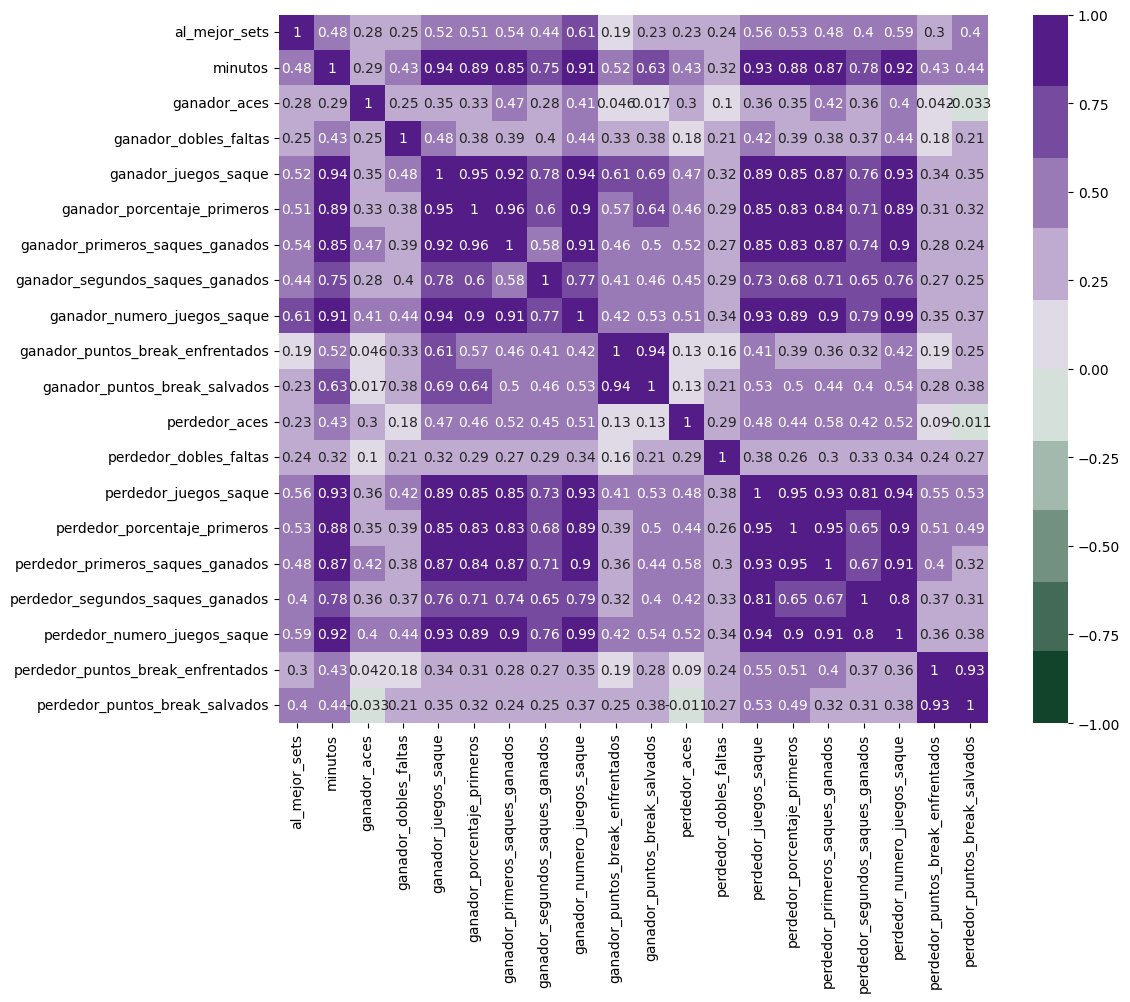

In [10]:
# Las representmos mediante un heatmap
# Configura el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df4,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True)
# Ajusta el espaciado para evitar que se corte la parte superior e inferior del heatmap
plt.tight_layout()
plt.show()

### Ya sabemos qué variables eliminar para crear el dataset utilizado para modelar

## Visualizacion de variables

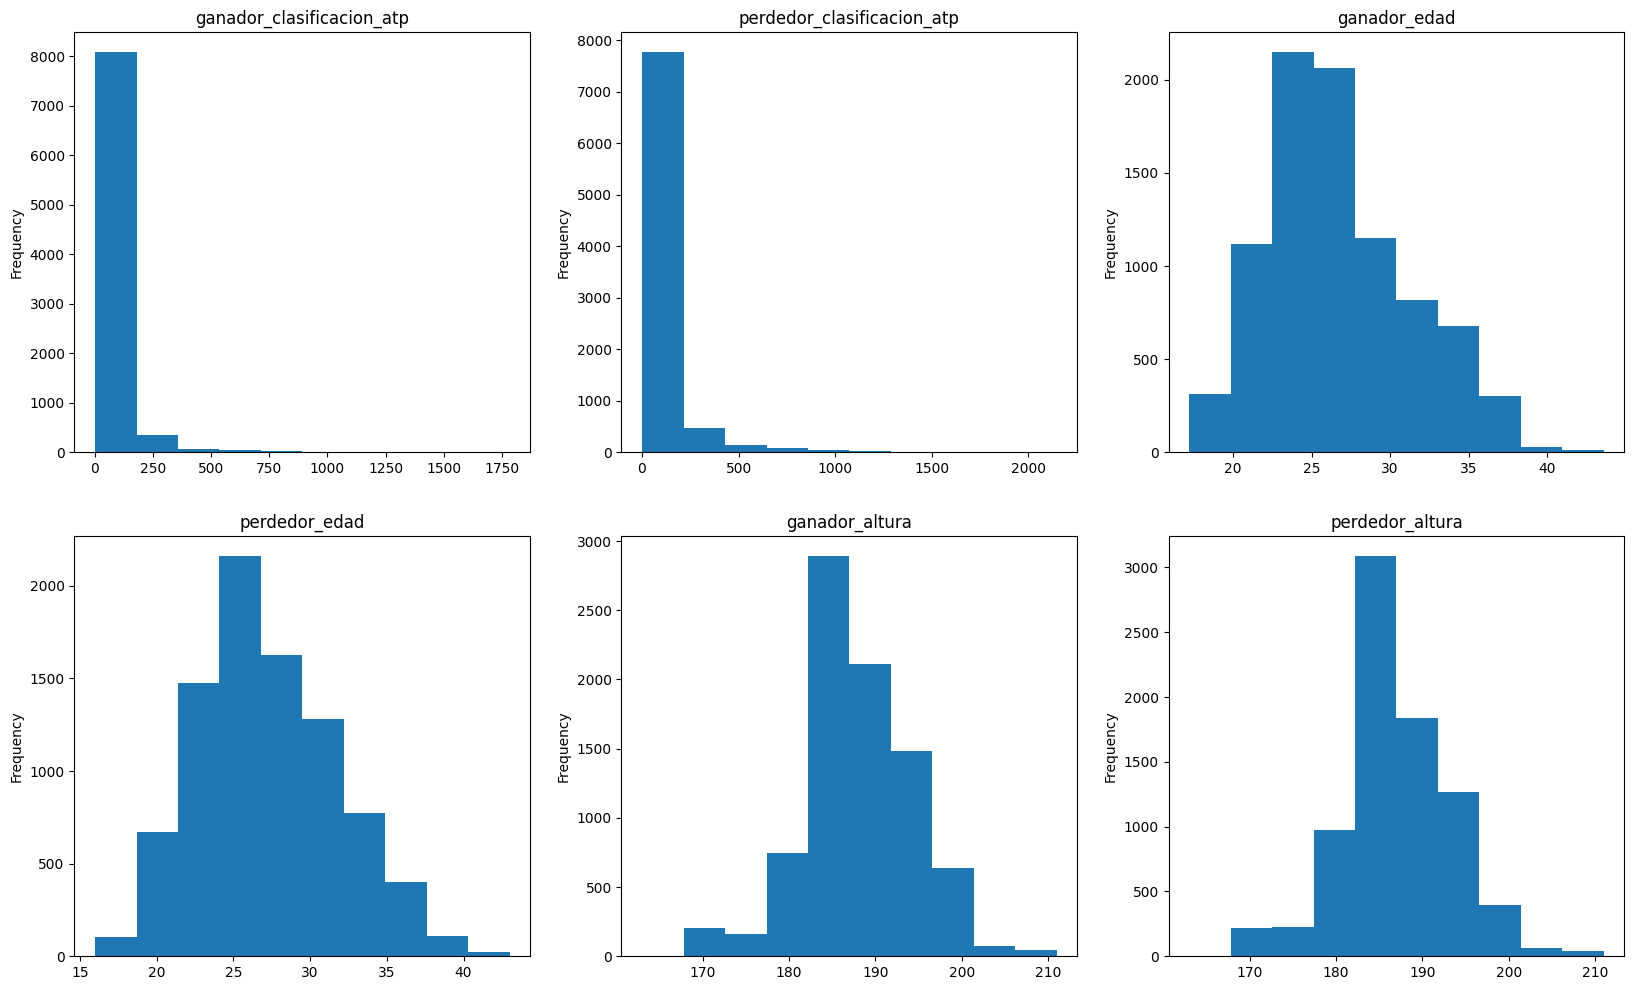

In [11]:
# Creamos un histograma de varias variables
campos = ['ganador_clasificacion_atp', 'perdedor_clasificacion_atp', 'ganador_edad', 'perdedor_edad', 'ganador_altura', 'perdedor_altura']
plt.figure(1, figsize=(20, 12))
for i in range(6):
    plt.subplot(2, 3, i+1)  
    atpPartidos[campos[i]].plot(kind='hist', title=campos[i])


## Nos centraremos en las victorias de los jugadores --> Será el target

### Victorias totales por jugador

In [12]:
ganadores = atpPartidos['ganador_nombre'].value_counts()
ganadores_mas_de_75 = ganadores[ganadores > 75]
ganadores = pd.DataFrame(ganadores_mas_de_75).reset_index()

In [13]:
# Datos
jugadores = ganadores['ganador_nombre'].tolist()
victorias = ganadores['count'].tolist()

# Creamos el gráfico de barras
fig = go.Figure(data=[go.Bar(x=jugadores, y=victorias)])

# Personalizamos el diseño del gráfico
fig.update_layout(
    title='Número de Victorias por Jugador',
    xaxis=dict(title='Jugador'),
    yaxis=dict(title='Número de Victorias')
)
fig.show()


Text(0.5, 1.0, 'Jugadores Top 10')

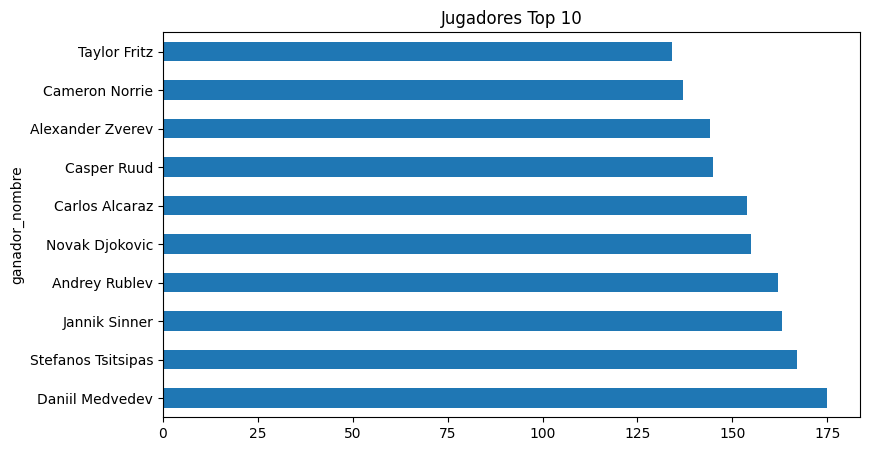

In [14]:
# Top 10

plt.figure(figsize=(9,5))
atpPartidos['ganador_nombre'].value_counts()[:10].plot(kind='barh')
plt.title('Jugadores Top 10')

### Victorias por superficie. Separamos por pista

C:\Users\puent\AppData\Local\Temp\ipykernel_16136\1365919060.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




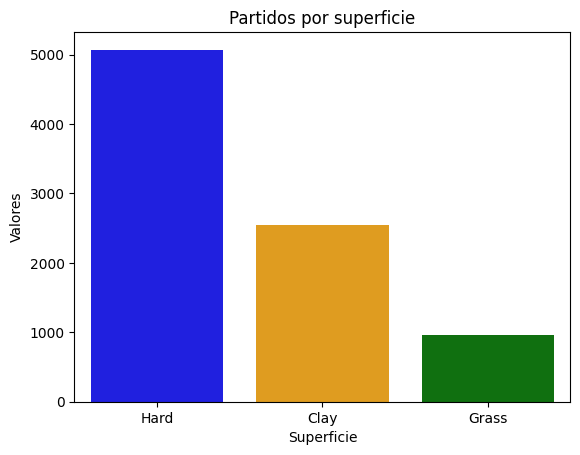

In [15]:
superficie = atpPartidos['superficie'].value_counts()
sns.barplot(superficie, palette=['blue', 'orange', 'green'])
plt.xlabel('Superficie')
plt.ylabel('Valores')
plt.title('Partidos por superficie')

plt.show()

### Pista dura

In [16]:
finales_hard = atpPartidos[(atpPartidos['superficie']=='Hard') & (atpPartidos['ronda'] =='F') ]
ganadores_hard = finales_hard['ganador_nombre'].value_counts()
ganadores_hard = pd.DataFrame(ganadores_hard).reset_index()

In [17]:
# Datos
jugadores = ganadores_hard['ganador_nombre'].tolist()
victorias = ganadores_hard['count'].tolist()

# Creamos el gráfico de barras
fig = go.Figure(data=[go.Bar(x=jugadores, y=victorias)])

# Personalizamos el diseño del gráfico
fig.update_layout(
    title='Número de Victorias en dura por Jugador',
    xaxis=dict(title='Jugador'),
    yaxis=dict(title='Número de Victorias'))

### Tierra batida

In [18]:
finales_clay = atpPartidos[(atpPartidos['superficie']=='Clay') & (atpPartidos['ronda'] =='F') ]
ganadores_clay = finales_clay['ganador_nombre'].value_counts()
ganadores_clay = pd.DataFrame(ganadores_clay).reset_index()

In [19]:
# Datos
jugadores = ganadores_clay['ganador_nombre'].tolist()
victorias = ganadores_clay['count'].tolist()

# Creamos el gráfico de barras
fig = go.Figure(data=[go.Bar(x=jugadores, y=victorias)])
fig.update_traces(marker_color='orange', selector=dict(type='bar'))

# Personalizamos el diseño del gráfico
fig.update_layout(
    title='Número de Victorias en tierra por Jugador',
    xaxis=dict(title='Jugador'),
    yaxis=dict(title='Número de Victorias')
)
fig.show()

### Hierba

In [20]:
finales_Grass = atpPartidos[(atpPartidos['superficie']=='Grass') & (atpPartidos['ronda'] =='F') ]
ganadores_Grass = finales_Grass['ganador_nombre'].value_counts()
ganadores_Grass = pd.DataFrame(ganadores_Grass).reset_index()

In [21]:
# Datos
jugadores = ganadores_Grass['ganador_nombre'].tolist()
victorias = ganadores_Grass['count'].tolist()

# Creamos el gráfico de barras
fig = go.Figure(data=[go.Bar(x=jugadores, y=victorias)])

# Aplicamos el color a cada barra individualmente
fig.update_traces(marker_color='green', selector=dict(type='bar'))

# Personalizamos el diseño del gráfico
fig.update_layout(
    title='Número de Victorias en hierba por Jugador',
    xaxis=dict(title='Jugador'),
    yaxis=dict(title='Número de Victorias')
)
fig.show()

## Títulos totales por jugador

In [22]:
#Filtramos por ronda final
finales = atpPartidos[atpPartidos['ronda']=='F']
finales.head(15)

,id_torneo,nombre_torneo,superficie,tamaño_cuadro,nivel_torneo,fecha_torneo,num_partido,ganador_id,ganador_nombre,ganador_mano,ganador_altura,ganador_pais,ganador_edad,perdedor_id,perdedor_nombre,perdedor_mano,perdedor_altura,perdedor_pais,perdedor_edad,resultado,al_mejor_sets,ronda,minutos,ganador_aces,ganador_dobles_faltas,ganador_juegos_saque,ganador_porcentaje_primeros,ganador_primeros_saques_ganados,ganador_segundos_saques_ganados,ganador_numero_juegos_saque,ganador_puntos_break_enfrentados,ganador_puntos_break_salvados,perdedor_aces,perdedor_dobles_faltas,perdedor_juegos_saque,perdedor_porcentaje_primeros,perdedor_primeros_saques_ganados,perdedor_segundos_saques_ganados,perdedor_numero_juegos_saque,perdedor_puntos_break_enfrentados,perdedor_puntos_break_salvados,ganador_clasificacion_atp,ganador_puntos_clasificacion_atp,perdedor_clasificacion_atp,perdedor_puntos_clasificacion_atp
62,2021-0096,Tokyo Olympics,Hard,64,A,20210724,299,100644,Alexander Zverev,R,198.0,GER,24.2,111575,Karen Khachanov,R,198.0,RUS,25.1,6-3 6-1,3,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7340.0,25.0,2235.0
90,2021-0308,Munich,Clay,32,A,20210426,300,105932,Nikoloz Basilashvili,R,185.0,GEO,29.1,105526,Jan Lennard Struff,R,193.0,GER,31.0,6-4 7-6(5),3,F,85.0,6.0,0.0,71.0,47.0,37.0,18.0,11.0,1.0,1.0,13.0,2.0,67.0,45.0,34.0,12.0,11.0,1.0,2.0,35.0,1645.0,44.0,1440.0
121,2021-0311,Queen's Club,Grass,32,A,20210614,300,126610,Matteo Berrettini,R,196.0,ITA,25.1,111815,Cameron Norrie,L,188.0,GBR,25.8,6-4 6-7(5) 6-3,3,F,117.0,19.0,1.0,84.0,64.0,58.0,11.0,16.0,0.0,0.0,4.0,5.0,88.0,68.0,54.0,11.0,15.0,4.0,6.0,9.0,4103.0,41.0,1510.0
148,2021-0314,Gstaad,Clay,32,A,20210719,300,134770,Casper Ruud,R,183.0,NOR,22.5,200384,Hugo Gaston,L,173.0,FRA,20.8,6-3 6-2,3,F,94.0,3.0,5.0,72.0,49.0,32.0,12.0,9.0,9.0,10.0,1.0,0.0,79.0,51.0,26.0,13.0,8.0,12.0,16.0,14.0,2840.0,155.0,489.0
175,2021-0315,Newport,Grass,32,A,20210712,300,104731,Kevin Anderson,R,203.0,RSA,35.1,202385,Jenson Brooksby,R,188.0,USA,20.7,7-6(8) 6-4,3,F,131.0,16.0,3.0,88.0,54.0,44.0,16.0,11.0,3.0,3.0,6.0,0.0,73.0,52.0,40.0,10.0,11.0,2.0,3.0,113.0,708.0,152.0,487.0
202,2021-0316,Bastad,Clay,32,A,20210712,300,134770,Casper Ruud,R,183.0,NOR,22.5,105948,Federico Coria,R,180.0,ARG,29.3,6-3 6-3,3,F,86.0,3.0,1.0,47.0,31.0,22.0,13.0,9.0,1.0,3.0,0.0,3.0,65.0,40.0,19.0,12.0,9.0,3.0,8.0,16.0,2725.0,77.0,933.0
229,2021-0319,Kitzbuhel,Clay,32,A,20210726,300,134770,Casper Ruud,R,183.0,NOR,22.5,124079,Pedro Martinez,R,185.0,ESP,24.2,6-1 4-6 6-3,3,F,129.0,3.0,3.0,70.0,41.0,27.0,20.0,13.0,0.0,2.0,1.0,2.0,95.0,63.0,37.0,13.0,13.0,5.0,10.0,14.0,3045.0,97.0,816.0
256,2021-0321,Stuttgart,Grass,32,A,20210607,300,105227,Marin Cilic,R,198.0,CRO,32.6,200000,Felix Auger Aliassime,R,193.0,CAN,20.8,7-6(2) 6-3,3,F,108.0,7.0,2.0,71.0,43.0,33.0,18.0,11.0,4.0,5.0,4.0,6.0,72.0,42.0,28.0,14.0,10.0,8.0,10.0,47.0,1388.0,21.0,2423.0
283,2021-0322,Geneva,Clay,32,A,20210517,300,134770,Casper Ruud,R,183.0,NOR,22.4,133430,Denis Shapovalov,L,185.0,CAN,22.0,7-6(6) 6-4,3,F,101.0,4.0,0.0,60.0,33.0,26.0,22.0,11.0,0.0,0.0,8.0,5.0,74.0,36.0,28.0,22.0,11.0,4.0,5.0,21.0,2485.0,15.0,2675.0
314,2021-0337,Vienna,Hard,32,A,20211025,300,100644,Alexander Zverev,R,198.0,GER,24.5,126207,Frances Tiafoe,R,188.0,USA,23.7,7-5 6-4,3,F,95.0,19.0,0.0,56.0,46.0,37.0,6.0,11.0,1.0,2.0,4.0,1.0,81.0,53.0,33.0,14.0,11.0,6.0,9.0,4.0,6680.0,49.0,1192.0


### Títulos totales

In [23]:
#Cogemos a los ganadores
campeones = pd.DataFrame(finales['ganador_nombre'].value_counts()).reset_index()

# Datos
jugadores = campeones['ganador_nombre'].tolist()
victorias = campeones['count'].tolist()

# Creamos el gráfico de barras
fig = go.Figure(data=[go.Bar(x=jugadores, y=victorias)])

# Personalizamos el diseño del gráfico
fig.update_layout(
    title='Número de titulos por Jugador',
    xaxis=dict(title='Jugador'),
    yaxis=dict(title='Titulos')
)

fig.show()

### Mano dominante de los campeones

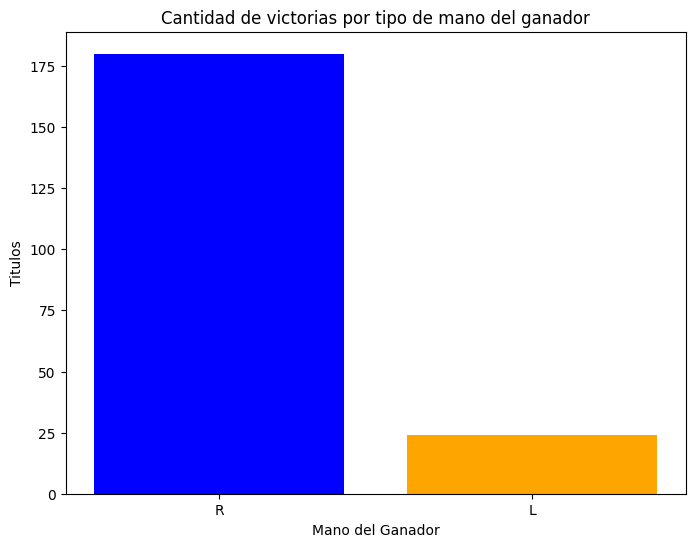

In [24]:
# Filtramos por mano
campeones_mano = pd.DataFrame(finales['ganador_mano'].value_counts()).reset_index()
mano_ganador = campeones_mano['ganador_mano']
count = campeones_mano['count']

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(mano_ganador, count, color=['blue', 'orange'])
plt.xlabel('Mano del Ganador')
plt.ylabel('Titulos')
plt.title('Cantidad de victorias por tipo de mano del ganador')
plt.show()

### Altura de los campeones

In [25]:
#Filtramos por altura
campeones_altura = pd.DataFrame(finales['ganador_altura'].value_counts()).reset_index()

#Creamos la figura con un histograma
fig = go.Figure(data=[go.Bar(x=campeones_altura['ganador_altura'], 
                              y=campeones_altura['count'],
                              marker_color='skyblue', 
                              marker_line_color='black',
                              marker_line_width=1)])

fig.update_layout(title='Histograma de la altura de los ganadores de torneos ATP',
                  xaxis_title='Altura del ganador',
                  yaxis_title='Cantidad')

fig.show()


### Nacionalidad más común de los campeones

In [26]:
# Filtramos por nacionalidad
campeones_nacionalidad = pd.DataFrame(finales['ganador_pais'].value_counts()).reset_index()

#Lo hacemos por Plotly que es más completo
fig = go.Figure(data=[go.Bar(x=campeones_nacionalidad['ganador_pais'], 
                              y=campeones_nacionalidad['count'],
                              marker_color='skyblue', 
                              marker_line_color='black',
                              marker_line_width=1)])

fig.update_layout(title='Histograma de la nacionalidad de los ganadores de torneos ATP',
                  xaxis_title='Nacionalidad del ganador',
                  yaxis_title='Cantidad')

fig.show()

### Edades de los ganadores

In [27]:
# Filtramos por edad
campeones_edad = pd.DataFrame(finales['ganador_edad'].value_counts()).reset_index()
# Usamos otro histograma
fig = go.Figure(data=[go.Bar(x=campeones_edad['ganador_edad'], 
                              y=campeones_edad['count'],
                              marker_color='skyblue', 
                              marker_line_color='black',
                              marker_line_width=1)])

fig.update_layout(title='Histograma de la edad de los ganadores de torneos ATP',
                  xaxis_title='Edad del ganador',
                  yaxis_title='Cantidad')

fig.show()

### Por ranking

In [28]:
# Filtramos
campeones_ranking = pd.DataFrame(finales['ganador_clasificacion_atp'].value_counts()).reset_index()
# Usamos histograma
fig = go.Figure(data=[go.Bar(x=campeones_ranking['ganador_clasificacion_atp'], 
                              y=campeones_ranking['count'],
                              marker_color='skyblue', 
                              marker_line_color='black',
                              marker_line_width=1)])

fig.update_layout(title='Histograma del ranking de los ganadores de torneos ATP',
                  xaxis_title='Ranking del ganador',
                  yaxis_title='Cantidad')

## Evolución de la clasificacion ATP de los 30 jugadores mas importantes

In [29]:
# Unimos los datos de ganadores y perdedores en una sola columna
ganadores = atpPartidos[['fecha_torneo', 'ganador_nombre', 'ganador_clasificacion_atp']].rename(columns={'ganador_nombre': 'jugador', 'ganador_clasificacion_atp': 'clasificacion_atp'})
perdedores = atpPartidos[['fecha_torneo', 'perdedor_nombre', 'perdedor_clasificacion_atp']].rename(columns={'perdedor_nombre': 'jugador', 'perdedor_clasificacion_atp': 'clasificacion_atp'})
data = pd.concat([ganadores, perdedores])

# Calculamos el promedio de la clasificación ATP para cada jugador en diferentes torneos
promedio_clasificacion = data.groupby(['jugador', 'fecha_torneo']).mean().reset_index()

# Seleccionamos los 20 jugadores con el promedio más bajo de clasificación ATP
top_jugadores = promedio_clasificacion.groupby('jugador').mean().sort_values(by='clasificacion_atp').head(30).index

# Filtramos los datos para incluir solo los 20 mejores jugadores
top_jugadores_data = promedio_clasificacion[promedio_clasificacion['jugador'].isin(top_jugadores)]

# Creamos el gráfico de líneas
fig = px.line(top_jugadores_data, x='fecha_torneo', y='clasificacion_atp', color='jugador', title='Movimiento de Rankings de los 30 Jugadores más Importantes', labels={'clasificacion_atp': 'Clasificación ATP', 'fecha_torneo': 'Fecha del Torneo'})
fig.show()

## Tipo de titulos por jugador y edad

In [30]:
torneo = atpPartidos['nivel_torneo'].value_counts()
# Cambiamos la denominacion para que se entienda bien con un mapeo
nuevos_nombres = {
    'G': 'Grand Slams',
    'M': 'Masters 1000s',
    'A': 'other tour-level events',
    'C': 'Challengers',
    'S': 'Satellites/ITFs',
    'F': 'Tour finals and other season-ending events',
    'D': 'Davis Cup'
}

# Aplicar el rename usando el mapeo
torneo['nivel_torneo'] = atpPartidos['nivel_torneo'].replace(nuevos_nombres)
# Contar la cantidad de torneos en cada nivel
conteo_niveles = torneo['nivel_torneo'].value_counts().reset_index()
conteo_niveles.columns = ['nivel_torneo', 'count']

# Crear el gráfico de barras
fig = px.bar(conteo_niveles, x='nivel_torneo', y='count', 
             labels={'count': 'Cantidad de Torneos', 'nivel_torneo': 'Nivel del Torneo'},
             title='Cantidad de Torneos por Nivel')
fig.show()

### Grand Slam

Text(0.5, 0, 'Edades de los ganadores en Grand Slam')

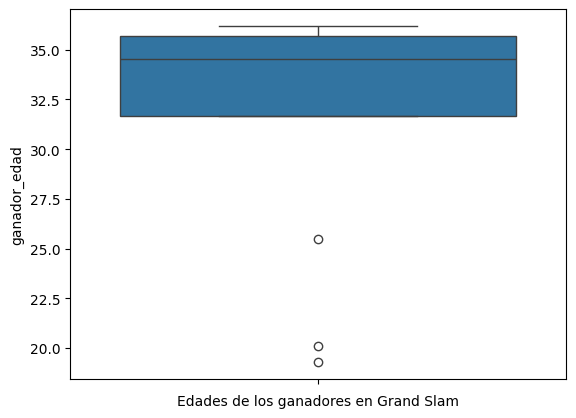

In [80]:
campeonesGS = finales[finales['nivel_torneo']=='G']
campeonesGS['ganador_nombre'].value_counts()
sns.boxplot(campeonesGS['ganador_edad'])
plt.xlabel('Edades de los ganadores en Grand Slam')

### Masters 1000

Text(0.5, 0, 'Edades de los ganadores en M1000')

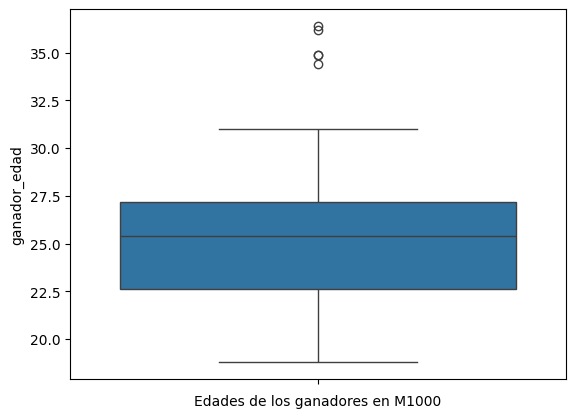

In [81]:
campeonesM1000 = finales[finales['nivel_torneo']=='M']
sns.boxplot(campeonesM1000['ganador_edad'])
plt.xlabel('Edades de los ganadores en M1000')

### Torneos ATP 500 y 250

Text(0.5, 0, 'Edades de los ganadores en torneos ATP')

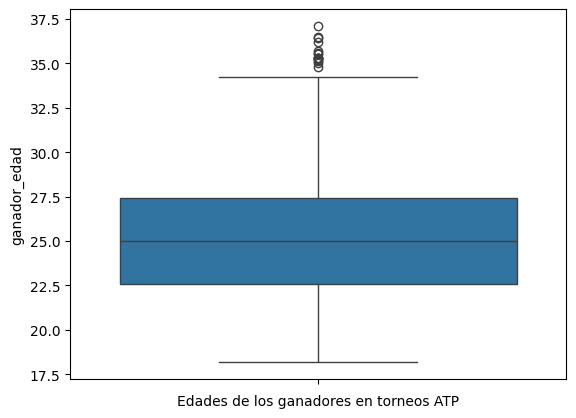

In [82]:
campeonesATP = finales[finales['nivel_torneo']=='A']
sns.boxplot(campeonesATP['ganador_edad'])
plt.xlabel('Edades de los ganadores en torneos ATP')


## Filtramos las finales por ranking de los jugadores

In [34]:
top_100 = atpPartidos[(atpPartidos['ganador_clasificacion_atp'] <= 100) & (atpPartidos['perdedor_clasificacion_atp'] <= 100)]
top_100_finales = top_100[top_100['ronda']=='F']
finalesTOP100 = len(top_100_finales)/len(finales)

In [35]:
top_50 = atpPartidos[(atpPartidos['ganador_clasificacion_atp'] <= 50) & (atpPartidos['perdedor_clasificacion_atp'] <= 50)]
top_50_finales = top_50[top_50['ronda']=='F']
finalesTOP50 = len(top_50_finales)/len(finales)

In [36]:
top_10 = atpPartidos[(atpPartidos['ganador_clasificacion_atp'] <= 10) & (atpPartidos['perdedor_clasificacion_atp'] <= 10)]
top_10_finales = top_10[top_10['ronda']=='F']
finalesTOP10 = len(top_10_finales)/len(finales)

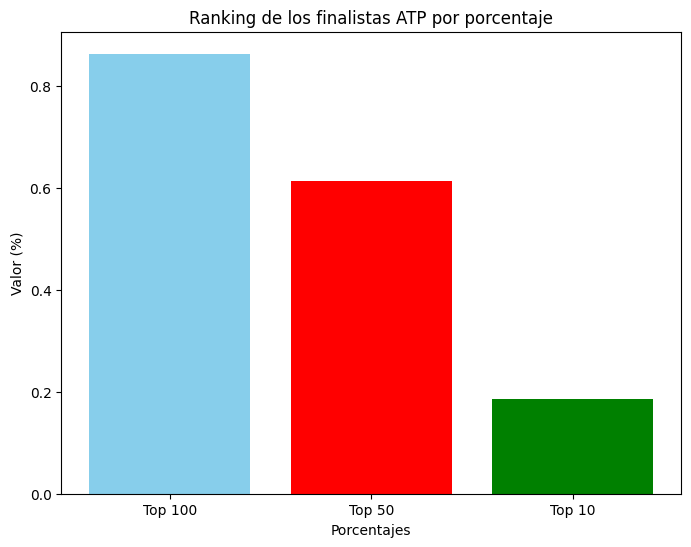

In [37]:

# Nombres de las barras
nombres = ['Top 100', 'Top 50', 'Top 10']

# Valores de los porcentajes
porcentajes = [finalesTOP100, finalesTOP50, finalesTOP10]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(nombres, porcentajes, color=['skyblue', 'red', 'green'])

# Agregar etiquetas y título
plt.xlabel('Porcentajes')
plt.ylabel('Valor (%)')
plt.title('Ranking de los finalistas ATP por porcentaje')

# Mostrar el gráfico
plt.show()

# Featuring Engeenering -> Limpieza y procesado de datos

## Importamos el csv de nuevo para hacerlo más rápido

In [38]:
ruta = r'C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/data/raw/'
tenis_df = ConcatenarCSV(ruta)
tenis_df.columns

3


Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'], dtype='object')

## Procesamos los datos para limpiarlos de nulos y efectuar el modelo

Procedemos a eliminar las características que son redundantes o están correlacionadas entre sí, y aquellas que obviamente no están disponibles antes de un partido para predecir.

**winner_name**, **loser_name** y **tourney_name** porque son casi redundantes y pueden ser reemplazadas respectivamente por ***winner_id***, ***loser_id*** y ***tourney_id***.

Las características minutes, **score**, **1stIn**, **_1stWon**, **SvGms**, **l_bpFaced**, **l_bpSaved** y **svpt** porque no pueden ser conocidas de antemano.

In [39]:
df = tenis_df.drop(columns=['score','tourney_name','winner_name',
                      'loser_name','minutes', 'l_1stIn', 'l_1stWon', 'l_2ndWon','l_ace', 'l_svpt',
                      'l_SvGms','l_bpFaced','l_df', 'l_bpSaved',  'w_1stIn', 'w_1stWon','w_2ndWon', 'w_SvGms',
                      'w_ace', 'w_svpt','w_bpFaced', 'w_bpSaved','w_df'])
print("columnas restantes:  ", df.columns)

columnas restantes:   Index(['tourney_id', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed', 'loser_entry', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'best_of', 'round', 'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'], dtype='object')


### Buscamos los valores nulos en las columnas para eliminarlos

In [40]:
porcentaje_nulos = df.isnull().sum() * 100 / len(df)
nulos_df = pd.DataFrame({'Columna': df.columns, 'Numero de valores nulos': df.isnull().sum(),
                                 'Porcentaje de nulos': porcentaje_nulos})
print(nulos_df.reset_index().drop(columns=['index']))

               Columna  Numero de valores nulos  Porcentaje de nulos
0           tourney_id                        0             0.000000
1              surface                       53             0.613710
2            draw_size                        0             0.000000
3        tourney_level                        0             0.000000
4         tourney_date                        0             0.000000
5            match_num                        0             0.000000
6            winner_id                        0             0.000000
7          winner_seed                     5001            57.908754
8         winner_entry                     7318            84.738305
9          winner_hand                        2             0.023159
10           winner_ht                      282             3.265401
11          winner_ioc                        0             0.000000
12          winner_age                        4             0.046318
13            loser_id            

### Eliminamos directamente las columnas con un mas de 50% de nulos

In [41]:
cols_eliminar =nulos_df[nulos_df['Porcentaje de nulos'] > 50]
print(cols_eliminar)

                   Columna  Numero de valores nulos  Porcentaje de nulos
winner_seed    winner_seed                     5001            57.908754
winner_entry  winner_entry                     7318            84.738305
loser_seed      loser_seed                     6469            74.907365
loser_entry    loser_entry                     6652            77.026401


In [42]:
df = df.drop(columns=cols_eliminar['Columna'].values)

### Eliminamos el resto de valores nulos --> Vemos el resultado

In [43]:
df= df.dropna()

In [44]:
df.shape

(7891, 22)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7891 entries, 0 to 8604
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          7891 non-null   object 
 1   surface             7891 non-null   object 
 2   draw_size           7891 non-null   int64  
 3   tourney_level       7891 non-null   object 
 4   tourney_date        7891 non-null   int64  
 5   match_num           7891 non-null   int64  
 6   winner_id           7891 non-null   int64  
 7   winner_hand         7891 non-null   object 
 8   winner_ht           7891 non-null   float64
 9   winner_ioc          7891 non-null   object 
 10  winner_age          7891 non-null   float64
 11  loser_id            7891 non-null   int64  
 12  loser_hand          7891 non-null   object 
 13  loser_ht            7891 non-null   float64
 14  loser_ioc           7891 non-null   object 
 15  loser_age           7891 non-null   float64
 16  best_of    

In [46]:
df

,tourney_id,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_hand,loser_ht,loser_ioc,loser_age,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2021-0096,Hard,64,A,20210724,237,126207,R,188.0,USA,23.4,126952,R,180.0,KOR,23.6,3,R64,53.0,1228.0,71.0,996.0
1,2021-0096,Hard,64,A,20210724,238,105526,R,193.0,GER,31.2,106329,L,183.0,BRA,27.1,3,R64,48.0,1410.0,95.0,829.0
2,2021-0096,Hard,64,A,20210724,239,111576,R,178.0,IND,23.9,104797,R,188.0,UZB,34.8,3,R64,160.0,471.0,197.0,354.0
3,2021-0096,Hard,64,A,20210724,240,105357,R,183.0,AUS,32.0,207518,R,185.0,ITA,19.3,3,R64,44.0,1476.0,61.0,1106.0
4,2021-0096,Hard,64,A,20210724,241,207830,R,183.0,CZE,20.7,105311,R,185.0,POR,32.3,3,R64,145.0,525.0,137.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,2023-M-DC-2023-WG1-PO-IND-DEN-01,Hard,4,D,20230203,4,208029,R,185.0,DEN,19.7,111576,R,178.0,IND,25.4,3,RR,9.0,3046.0,506.0,70.0
8583,2023-M-DC-2023-WG2-M-IND-MAR-01,Hard,4,D,20230916,2,111576,R,178.0,IND,26.0,125842,R,191.0,SUI,28.3,3,RR,156.0,397.0,779.0,29.0
8593,2023-M-DC-2023-WG2-M-MON-ECU-01,Clay,4,D,20230915,2,200031,R,185.0,MON,27.0,105877,R,185.0,ECU,31.7,3,RR,452.0,97.0,185.0,326.0
8603,2023-M-DC-2023-WG2-M-URU-EGY-01,Clay,4,D,20230916,1,105633,R,183.0,EGY,32.9,202378,R,178.0,ARG,24.1,3,RR,463.0,93.0,828.0,24.0


## Dividimos la columna de tourney_date en 3 para que sea más cómodo


In [47]:
df['tourney_year'] = df.tourney_date.astype(str).str[:4].astype(int)
df['tourney_month'] = df.tourney_date.astype(str).str[4:6].astype(int)
df['tourney_day'] = df.tourney_date.astype(str).str[6:8].astype(int)
df = df.drop(columns=['tourney_date'])


## Eliminamos valores desconocidos en la mano del jugador

In [48]:
df['winner_hand'].value_counts()

winner_hand
R    6921
L     958
U      12
Name: count, dtype: int64

In [49]:
df['loser_hand'].value_counts()

loser_hand
R    6770
L    1094
U      27
Name: count, dtype: int64

In [50]:
df = df[df['winner_hand'] != 'U']
df = df[df['loser_hand'] != 'U']

## Codificamos las variables categóricas usando label encoder y uniformamos las numéricas

In [51]:
variables_categoricas = ['tourney_id', 'surface', 'tourney_level', 'winner_hand', 'winner_ioc', 'loser_hand', 'loser_ioc', 'round']
label_encoder = LabelEncoder()

for col in variables_categoricas:
    df[col] = label_encoder.fit_transform(df[col])

In [52]:
# Convertir dtypes de int32 a int64
df[['tourney_id', 'surface', 'tourney_year', 'tourney_level', 'winner_hand', 'winner_ioc', 'loser_hand', 'loser_ioc', 'round', 'tourney_month', 'tourney_day']] = df[['tourney_id', 'surface', 'tourney_level', 'tourney_year', 'winner_hand', 'winner_ioc', 'loser_hand', 'loser_ioc', 'round', 'tourney_month', 'tourney_day']].astype('int64')

# Convertir dtypes de float32 a float64
df[['winner_ht', 'winner_age', 'loser_ht', 'loser_age', 'winner_rank', 'winner_rank_points', 'loser_rank']] = df[['winner_ht', 'winner_age', 'loser_ht', 'loser_age', 'winner_rank', 'winner_rank_points', 'loser_rank']].astype('float64')

In [53]:
df.dtypes

tourney_id              int64
surface                 int64
draw_size               int64
tourney_level           int64
match_num               int64
winner_id               int64
winner_hand             int64
winner_ht             float64
winner_ioc              int64
winner_age            float64
loser_id                int64
loser_hand              int64
loser_ht              float64
loser_ioc               int64
loser_age             float64
best_of                 int64
round                   int64
winner_rank           float64
winner_rank_points    float64
loser_rank            float64
loser_rank_points     float64
tourney_year            int64
tourney_month           int64
tourney_day             int64
dtype: object

## Resultado final --> Lo guardamos en un csv

In [54]:
df

,tourney_id,surface,draw_size,tourney_level,match_num,winner_id,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_hand,loser_ht,loser_ioc,loser_age,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year,tourney_month,tourney_day
0,0,2,64,2021,237,126207,1,188.0,57,23.4,126952,1,180.0,37,23.6,3,6,53.0,1228.0,71.0,996.0,0,7,24
1,0,2,64,2021,238,105526,1,193.0,27,31.2,106329,0,183.0,8,27.1,3,6,48.0,1410.0,95.0,829.0,0,7,24
2,0,2,64,2021,239,111576,1,178.0,30,23.9,104797,1,188.0,64,34.8,3,6,160.0,471.0,197.0,354.0,0,7,24
3,0,2,64,2021,240,105357,1,183.0,1,32.0,207518,1,185.0,34,19.3,3,6,44.0,1476.0,61.0,1106.0,0,7,24
4,0,2,64,2021,241,207830,1,183.0,16,20.7,105311,1,185.0,48,32.3,3,6,145.0,525.0,137.0,570.0,0,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,357,2,4,2023,4,208029,1,185.0,17,19.7,111576,1,178.0,31,25.4,3,7,9.0,3046.0,506.0,70.0,1,2,3
8583,358,2,4,2023,2,111576,1,178.0,30,26.0,125842,1,191.0,54,28.3,3,7,156.0,397.0,779.0,29.0,1,9,16
8593,359,0,4,2023,2,200031,1,185.0,38,27.0,105877,1,185.0,19,31.7,3,7,452.0,97.0,185.0,326.0,1,9,15
8603,360,0,4,2023,1,105633,1,183.0,20,32.9,202378,1,178.0,0,24.1,3,7,463.0,93.0,828.0,24.0,1,9,16


In [55]:
#Comprobamos la limpieza del df
df.isnull().count()

tourney_id            7853
surface               7853
draw_size             7853
tourney_level         7853
match_num             7853
winner_id             7853
winner_hand           7853
winner_ht             7853
winner_ioc            7853
winner_age            7853
loser_id              7853
loser_hand            7853
loser_ht              7853
loser_ioc             7853
loser_age             7853
best_of               7853
round                 7853
winner_rank           7853
winner_rank_points    7853
loser_rank            7853
loser_rank_points     7853
tourney_year          7853
tourney_month         7853
tourney_day           7853
dtype: int64

In [56]:
rutaDFLimpio = r'C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/data/processed'
guardar_csv(df, 'dfLimpio.csv', rutaDFLimpio)

El DataFrame se ha guardado correctamente en 'C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/data/processed/dfLimpio.csv'.


# Modelado supervisado

In [57]:
df_limpio = pd.read_csv('C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/data/processed/dfLimpio.csv')
df_limpio.shape

(7853, 24)

## Regresion Logística --> Predice el ganador

In [58]:
# Paso 1: Preparación de los datos
X = df_limpio.drop(columns='winner_id')
y = df_limpio['winner_id']

# Paso 2: División de los datos  y escalar las características
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 3: Entrenar el modelo con los datos escalados
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# Paso 4: Evaluar el modelo
y_pred = model.predict(X_test_scaled)
LogisticRegression_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", LogisticRegression_accuracy)


Accuracy: 0.7243793761935073


In [59]:
# Comparación de los resultados
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

      Actual  Predicted
5683  111460     111460
5039  111513     111513
6888  208029     207989
4886  125802     125802
2388  104871     104871
...      ...        ...
4461  105430     105575
3961  104468     104468
415   105138     105138
4825  122330     122330
7077  127339     111797

[1571 rows x 2 columns]


## Random Forest Classifier--> Predice el ganador

In [60]:
# Entrenamiento del modelo
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Evaluación del modelo
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest:", accuracy_rf)

Accuracy Random Forest: 0.9522597071928708


In [61]:
# Comparación de los resultados
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

      Actual  Predicted
5683  111460     111460
5039  111513     111513
6888  208029     207989
4886  125802     125802
2388  104871     104871
...      ...        ...
4461  105430     105575
3961  104468     104468
415   105138     105138
4825  122330     122330
7077  127339     111797

[1571 rows x 2 columns]


### Comprobamos las features importances

In [62]:
#Pillamos features importances
importancias = model_rf.feature_importances_
nombres_caracteristicas = X.columns
df_importancias = pd.DataFrame({'Feature': nombres_caracteristicas, 'Importance': importancias})
df_importancias

,Feature,Importance
0,tourney_id,0.041959
1,surface,0.010959
2,draw_size,0.009233
3,tourney_level,0.016455
4,match_num,0.024894
5,winner_hand,0.022718
6,winner_ht,0.146145
7,winner_ioc,0.163767
8,winner_age,0.152890
9,loser_id,0.023263


## Bagging que combina 100 árboles de decisión con validación cruzada --> Predice el ganador

In [63]:
#Separamos en X e Y
caracteristicas = df_limpio.drop(columns='winner_id', axis=1)
target = df_limpio['winner_id']

#Instanciamos los modelos
Arbol_decision = DecisionTreeClassifier(max_depth=5,random_state=42)
Bagging = BaggingClassifier(
    base_estimator = Arbol_decision,
    n_estimators=500, # Cantidad de árboles
    max_samples=100, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping
    max_features = 3, # Features que utiliza en el boostrapping. Cuanto más bajo, mejor generalizará y menos overfitting
    random_state=42)

#Lo entrenamos
Bagging.fit(caracteristicas, target)
predicciones = Bagging.predict(caracteristicas)
bagging_score = accuracy_score(target, predicciones)
print("Accuracy Bagging:", bagging_score)



C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy Bagging: 0.5204380491531899


In [64]:
# Creamos un DataFrame para comparar las predicciones con el target
resultados = pd.DataFrame({'Predicciones': predicciones, 'Target': target})
resultados.head(15)

,Predicciones,Target
0,126207,126207
1,100644,105526
2,126774,111576
3,200282,105357
4,134770,207830
5,122330,105062
6,111815,136440
7,200175,200175
8,106218,106218
9,128034,106078


In [65]:
# Realizamos validación cruzada
scores = cross_val_score(Bagging, caracteristicas, target, cv=5)

# Puntajes de validación cruzada
print("Puntajes de validación cruzada:", scores)

# Calcular y mostrar el promedio de los puntajes
print("Promedio de puntajes de validación cruzada:", scores.mean())

C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\model_selection\_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:



Puntajes de validación cruzada: [0.42584341 0.46403565 0.44875875 0.4388535  0.37834395]
Promedio de puntajes de validación cruzada: 0.43116705250824056


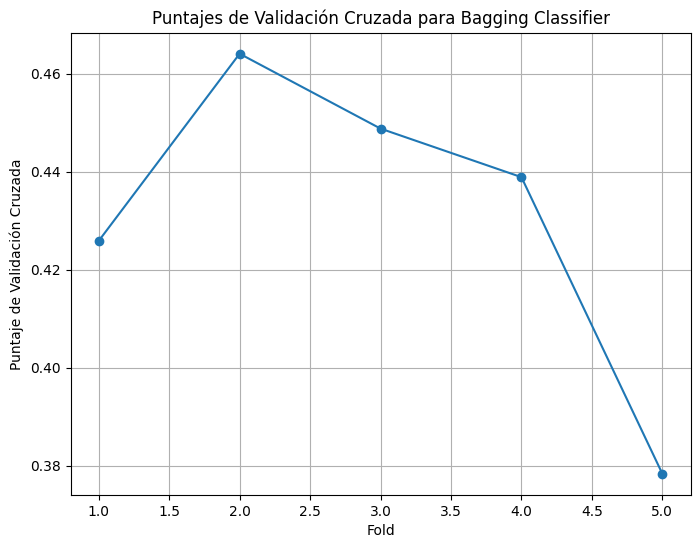

In [66]:
# Representamos la validación cruzada
plt.figure(figsize=(8, 6))

# Grafica de los puntajes de validación cruzada
plt.plot(range(1, 6), scores, marker='o', linestyle='-')

# Agregamos etiquetas y título
plt.xlabel('Fold')
plt.ylabel('Puntaje de Validación Cruzada')
plt.title('Puntajes de Validación Cruzada para Bagging Classifier')
plt.grid(True)
plt.show()

## Adaboost --> predice el ganador

In [67]:
#Instanciamos el AdaBoost
estimator = DecisionTreeClassifier(max_depth=3)

ada = AdaBoostClassifier(base_estimator = estimator,
                             n_estimators=100,
                             learning_rate=0.5,
                             random_state=42)

#Entrenamos el modelo
ada.fit(caracteristicas, target)
predicciones_3 = ada.predict(caracteristicas)
adaBoost_score = accuracy_score(target, predicciones_3)
print("El score del addaboos es: ", adaBoost_score)



C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



El score del addaboos es:  0.939131542085827


In [68]:
# Creamos un DataFrame para comparar las predicciones con el target
resultados = pd.DataFrame(data={'Predicciones': predicciones_3, 'Target': target})
resultados.head(15)

,Predicciones,Target
0,126207,126207
1,105870,105526
2,111576,111576
3,105357,105357
4,207830,207830
5,105062,105062
6,136440,136440
7,200175,200175
8,106218,106218
9,106078,106078


## XGBoost --> Predice el ganador

In [69]:
# Instancia del modelo XGBoostClassifier
xgb_classifier = XGBClassifier(n_estimators=50)

# Inicializamos el codificador
label_encoder = LabelEncoder()

# Convertimos la variable categórica a valores numéricos discretos
y_encoded = label_encoder.fit_transform(y)

# Entrenamos el modelo con las etiquetas codificadas
xgb_classifier.fit(X, y_encoded)

# Predecimos
predicciones_2 = xgb_classifier.predict(X)

##Calculamos el accuracy
xgb_accuracy = accuracy_score(y_encoded, predicciones_2)
print("El score de XGBoost es :", xgb_accuracy)

El score de XGBoost es : 0.9923596077932001


In [70]:
# Creamos un DataFrame para comparar las predicciones con el target
resultados = pd.DataFrame(data={'Predicciones': predicciones_2, 'Target': y_encoded})
resultados.head(15)

,Predicciones,Target
0,182,182
1,53,53
2,148,148
3,41,41
4,270,270
5,32,32
6,212,212
7,228,228
8,111,111
9,99,99


# Modelos supervisados

In [71]:


# Seleccionar las características relevantes para el clustering (excluyendo tourney_id y winner_id)
X = df_limpio.drop(columns=['tourney_id', 'winner_id'])

# Normalizar los datos si es necesario
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Definir el número de clusters
num_clusters = 5

# Crear un modelo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada muestra
cluster_labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df_limpio['Cluster'] = cluster_labels

# Guardar el DataFrame con las etiquetas de cluster
ruta_destino = "C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/data/processed/"
guardar_csv(df_limpio, 'datos_con_clusters.csv', ruta_destino)

# Analizar los resultados
cluster_centers = kmeans.cluster_centers_
cluster_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Centros de los clusters:")
print(cluster_df)

# Contar el número de muestras en cada cluster
cluster_counts = df_limpio['Cluster'].value_counts()
print("\nNúmero de muestras en cada cluster:")
print(cluster_counts)


C:\Users\puent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



El DataFrame se ha guardado correctamente en 'C:/Users/puent/OneDrive/Escritorio/Javi Bootcamp/Data-Science-TBB-main/SCRIPTS/Proyectos/Machine Learning/src/data/processed//datos_con_clusters.csv'.
Centros de los clusters:
    surface  draw_size  tourney_level   match_num  winner_hand   winner_ht  winner_ioc  winner_age       loser_id  loser_hand    loser_ht  loser_ioc  loser_age   best_of     round  winner_rank  winner_rank_points  loser_rank  loser_rank_points  tourney_year  tourney_month  tourney_day
0  1.164456  63.830239    2022.053050  244.371353     0.877984  187.244032   27.533156   26.739523  143863.992042    0.572944  185.668435  35.506631  24.768700  3.413793  4.612732    63.819629         1839.360743   88.734748         812.546419      1.297082       5.448276    17.493369
1  1.379585  63.929825    2022.035088  243.084530     0.867624  187.588517   30.950558   26.921691  111593.728868    0.858054  188.023923  37.135566  26.660606  3.392344  4.521531    63.665072         2015.

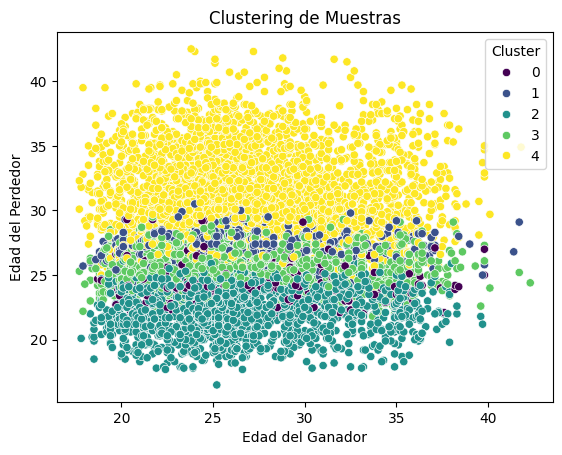

In [72]:
# Creamos los clusters utilizando dos características (por ejemplo, winner_age y loser_age)
sns.scatterplot(data=df_limpio, x='winner_age', y='loser_age', hue='Cluster', palette='viridis')
plt.title('Clustering de Muestras')
plt.xlabel('Edad del Ganador')
plt.ylabel('Edad del Perdedor')
plt.show()

# Resultados finales 

In [73]:
 ##Creamos un DataFrame con los puntajes y las ordenamos
resultados_finales = pd.DataFrame({'Modelo': ['XGBoost','Regresión logística','Bagging', 'Random Forest', 'AdaBoost'], 'Resultado': [xgb_accuracy,LogisticRegression_accuracy ,bagging_score, accuracy_rf, adaBoost_score]})
resultados_finales.sort_values(by='Resultado', ascending=False)

,Modelo,Resultado
0,XGBoost,0.992360
3,Random Forest,0.952260
4,AdaBoost,0.939132
1,Regresión logística,0.724379
2,Bagging,0.520438


## Conclusiones

Las principales conclusiones a las que llegamos son las siguientes:

1. El tenis profesional como deporte de masas es muy jugoso y completo para poder trabajar con datos.
2. Hay muchisimos datasets que permiten trabajar con muchas variables y filas, tanto categóricas como numéricas.
3. El EDA arroja muchisima informacion acerca del perfil de los jugadores que ganan partidos de todo tipo, tanto de nivel como de superficie o caracteristicas físicas del jugador .
4. La calidad de los datos ha permitido poder quedarnos con el 90% de las filas y el 50% de las columnas (la mayoría de las descartadas son correlaciones)
5. Se pueden hacer buenos modelos predictivos. Ideal para el estudio de los jugadores o para las casas de apuestas
6. Los modelos clasificatorios de ensembles funcionan especialmente bien, con buenos scores, como XGboost, AdaBoost o Random Forest
7. Un modelo simple como la regresión logística puede funcionar relativamente bien.
7. Se pueden clasificar bien los datos con modelos no supervisados como Kmeans
